<a href="https://colab.research.google.com/github/PierreKimbanziR/people_counter/blob/main/labelize_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Labelization
In order to train our YOLOv5 model with our dataset we need to process the images by adding the bounding box rectangle and the label on the image. 
To do so we will use the Json file containing the labels, image_ids and bounding boxes.

## Installing dependencies

In [26]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-nywbyni0
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-nywbyni0


# Labelization

In [27]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import json
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

## Labelization function
Iteration over every images contained in the image folder

In [29]:
def labelizator():
  path = "/content/drive/MyDrive/Peoples/train/"
  images = [img for img in os.listdir(path) if img.endswith(".jpg")]
  for image in images:
    
    img_path = f"{path}{image}"
    img_name = Path(image).stem

    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    img.shape
    w = img.shape[1]
    h = img.shape[0]

    

    json_file = open("/content/drive/MyDrive/Peoples/train/labels.json")
    annotations = json.loads(json_file.read())

    img_data = annotations[img_name]
    print(img_data)
    for dic  in img_data.values():
      label = dic['label']
      box = dic["bounding_box"]
        
      x1 = float(box[0]) * w
      y1 = float(box[2]) * h
      x2 = float(box[1]) * w
      y2 = float(box[3]) * h
      cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x2), int(y2)),
          color=(0, 255, 0),
          thickness=2
        )
      
      ((label_width, label_height), _) = cv2.getTextSize(
            label,
            fontFace=cv2.FONT_HERSHEY_PLAIN,
            fontScale=1.75,
            thickness=2
        )
      cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
          color=(0, 255, 0),
          thickness=cv2.FILLED
        )
      cv2.putText(
          img,
          label,
          org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
          fontFace=cv2.FONT_HERSHEY_PLAIN,
          fontScale=1.75,
          color=(255, 255, 255),
          thickness=2
        )
    cv2.imwrite(f"/content/drive/MyDrive/Peoples/train/annotated_images/{image}", img)

In [ ]:
### listing categories
import os 
categories = [x for x in os.listdir("/content/drive/MyDrive/OpenImages/test") if x != "annotations"]

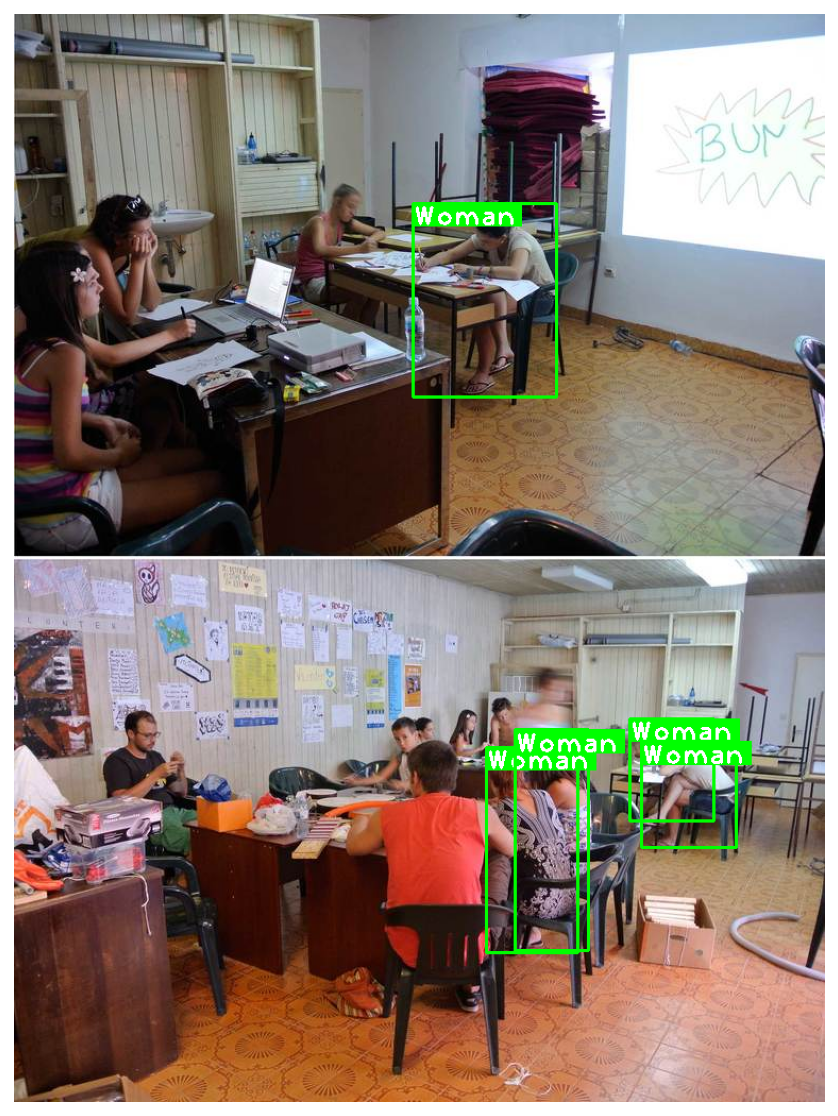

In [13]:
plt.imshow(img)
plt.axis('off');

In [30]:
labelizator()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
{'0': {'bounding_box': ['0.05042', '0.863866', '0.07625', '0.99875'], 'label': 'Woman'}}
{'0': {'bounding_box': ['0.14375', '0.510625', '0.10996199999999999', '0.9981200000000001'], 'label': 'Man'}, '1': {'bounding_box': ['0.0', '0.0825', '0.445489', '0.638158'], 'label': 'Man'}, '2': {'bounding_box': ['0.0', '0.159375', '0.56109', '0.9990600000000001'], 'label': 'Man'}, '3': {'bounding_box': ['0.41125', '0.538125', '0.506579', '0.792293'], 'label': 'Man'}, '4': {'bounding_box': ['0.426875', '0.479375', '0.302632', '0.480263'], 'label': 'Man'}, '5': {'bounding_box': ['0.448125', '0.538125', '0.451128', '0.6437970000000001'], 'label': 'Man'}, '6': {'bounding_box': ['0.46125', '0.9275', '0.009398', '0.9990600000000001'], 'label': 'Man'}, '7': {'bounding_box': ['0.481875', '0.519375', '0.30451100000000003', '0.47274399999999994'], 'label': 'Man'}, '8': {'bounding_box': ['0.906875', '0.951875', '0.348684', '0.513

8000